In [7]:
import tensorflow as tf

In [8]:
#!unzip "/content/drive/MyDrive/water analysis/water resize data.zip" -d "/content/drive/MyDrive/water analysis/"

In [9]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import os 
os.getcwdb()

b'/content'

In [12]:
%cd /content/drive/MyDrive/soil analysis

/content/drive/MyDrive/soil analysis


In [14]:
import splitfolders

splitfolders.ratio('/content/drive/MyDrive/soil analysis', output="split data", seed=1337, ratio=(.7, 0.3,)) 


Copying files: 2454 files [00:54, 45.28 files/s]


In [83]:

import os
import glob
import h5py
from PIL import Image
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model
from tensorflow.keras.optimizers import Adam , SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import numpy as np

In [84]:



from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( preprocessing_function= preprocess_input,
                                   horizontal_flip = True,
                                     rescale=1./255 )

batch_size = 16
validation_datagen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                        horizontal_flip = True,
                                        rescale=1./255)

train_data = train_datagen.flow_from_directory(
                    '/content/drive/MyDrive/soil analysis/split data/train',
                    target_size=(224, 224),batch_size= batch_size)

batches = validation_datagen.flow_from_directory(
                    '/content/drive/MyDrive/soil analysis/split data/val',
                    target_size=(224,224), batch_size= 738)


Found 1716 images belonging to 4 classes.
Found 738 images belonging to 4 classes.


In [85]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

imgs, labels = next(batches)

batches.class_indices

{'Mary soil': 0, 'chalky': 1, 'sand': 2, 'silt': 3}

In [86]:
categories = {
'Mary soil': 0, 'chalky': 1, 'sand': 2, 'silt': 3
}

categories

{'Mary soil': 0, 'chalky': 1, 'sand': 2, 'silt': 3}

In [87]:
from sklearn.model_selection import train_test_split
# Train, validation and test split

X_val, X_test, y_val, y_test = train_test_split(imgs,labels, test_size=0.5, random_state=7)



In [88]:
print("*-*-*-*-*-*")
print("Train")
print(X_val.shape)
print(y_val.shape)

print("*-*-*-*-*-*")
print("Test")
print(X_test.shape)
print(y_test.shape)

*-*-*-*-*-*
Train
(369, 224, 224, 3)
(369, 4)
*-*-*-*-*-*
Test
(369, 224, 224, 3)
(369, 4)


In [89]:
from tensorflow.keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))

94781440/94765736 [==============================] - 0s 0us/step


In [90]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(4, activation='softmax'))

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 dropout_12 (Dropout)        (None, 7, 7, 2048)        0         
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_24 (Dense)            (None, 512)               51380736  
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)              

In [92]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [93]:
history = model.fit(
                    train_data,
                    validation_data = (X_val, y_val),
                    epochs=30)

Epoch 1/30
108/108 [==============================] - 53s 377ms/step - loss: 2.9204 - accuracy: 0.3601 - val_loss: 1215.3738 - val_accuracy: 0.2358
Epoch 2/30
108/108 [==============================] - 38s 352ms/step - loss: 1.4385 - accuracy: 0.4580 - val_loss: 1125.4292 - val_accuracy: 0.2358
Epoch 3/30
108/108 [==============================] - 38s 354ms/step - loss: 1.2219 - accuracy: 0.5303 - val_loss: 52.5920 - val_accuracy: 0.2304
Epoch 4/30
108/108 [==============================] - 38s 350ms/step - loss: 1.0923 - accuracy: 0.5944 - val_loss: 36.6867 - val_accuracy: 0.2358
Epoch 5/30
108/108 [==============================] - 38s 349ms/step - loss: 0.9173 - accuracy: 0.6620 - val_loss: 21.8438 - val_accuracy: 0.2358
Epoch 6/30
108/108 [==============================] - 38s 349ms/step - loss: 0.8229 - accuracy: 0.7028 - val_loss: 19.5109 - val_accuracy: 0.2358
Epoch 7/30
108/108 [==============================] - 38s 350ms/step - loss: 0.7678 - accuracy: 0.7547 - val_loss: 16.00

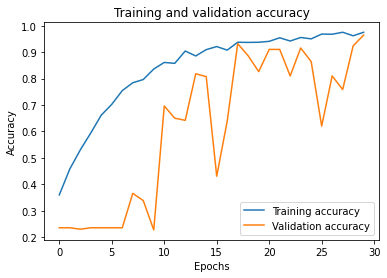

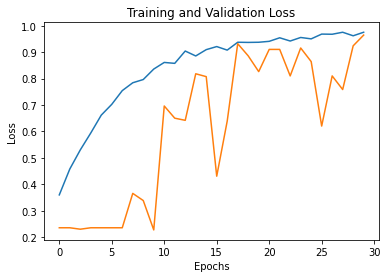

In [94]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot using Seaborn

plt.plot(history.history['accuracy'], label="Training loss")
plt.plot(history.history['val_accuracy'], label="Validation loss")
#my_plot = sns.lineplot(data=history[["loss","validation_loss"]])
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()

In [95]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 1s 100ms/step - loss: 0.1329 - accuracy: 0.9566


[0.13286076486110687, 0.9566395878791809]

In [96]:
import numpy as np
import pandas as pd
y_test.shape


(369, 4)

In [97]:
y_pred = model.predict(X_test, verbose=0)



In [98]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

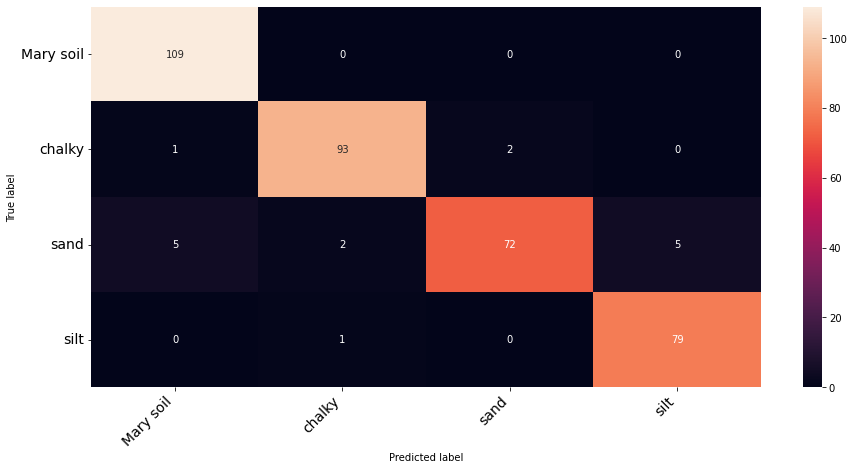

In [99]:
class_names = batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (15,7), fontsize=14)

In [100]:
# From categorical outputs to discrete values

y_pred_ = [np.argmax(y) for y in y_pred]
y_test_ = [np.argmax(y) for y in y_test]

from sklearn.metrics import classification_report
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       109
           1       0.97      0.97      0.97        96
           2       0.97      0.86      0.91        84
           3       0.94      0.99      0.96        80

    accuracy                           0.96       369
   macro avg       0.96      0.95      0.95       369
weighted avg       0.96      0.96      0.96       369

